In [83]:
library(ggplot2)
require(gridExtra)
d = read.csv(file = "./STK_Data_Gates_2017.csv", header = TRUE)


In [84]:
d$Date = as.Date(d$Date, format = "%m/%d/%Y")
names(d)[2] = "MeanRate"
names(d)[3] = "MeanScore"
names(d)[4] = "GroupSize"
names(d)[5] = "GroupLabel"

### Group B has highest MeanRate and lowest GroupSize in terms of mean. Group A and C have relatively the same MeanRate so their GroupSize are not very far from each other in terms of mean.

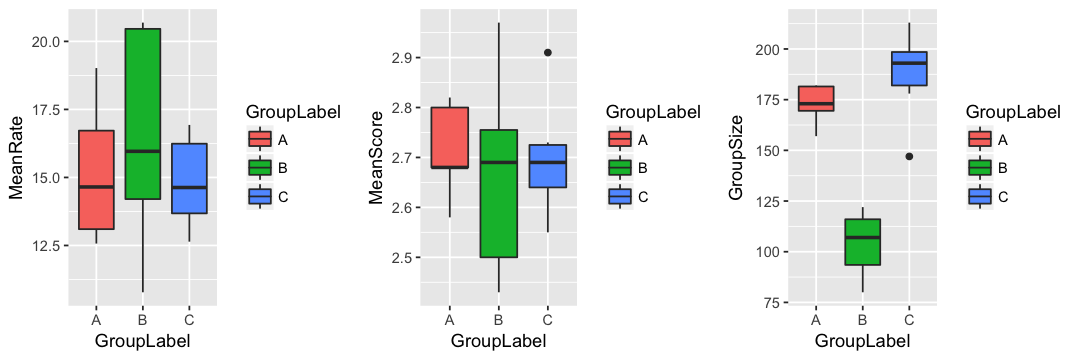

In [85]:
#boxplot
options(repr.plot.width=9, repr.plot.height=3)
boxp1 <- ggplot(d, aes(GroupLabel, MeanRate)) + geom_boxplot(aes(fill = GroupLabel))
boxp2 <- ggplot(d, aes(GroupLabel, MeanScore)) + geom_boxplot(aes(fill = GroupLabel))
boxp3 <- ggplot(d, aes(GroupLabel, GroupSize)) + geom_boxplot(aes(fill = GroupLabel))
grid.arrange(boxp1,boxp2, boxp3,ncol=3)

### MeanScore and MeanRate have strong negative correlation while GroupSize and MeanScore is weakly positive correlated and GroupSize and MeanRate are weakly negative correlated.

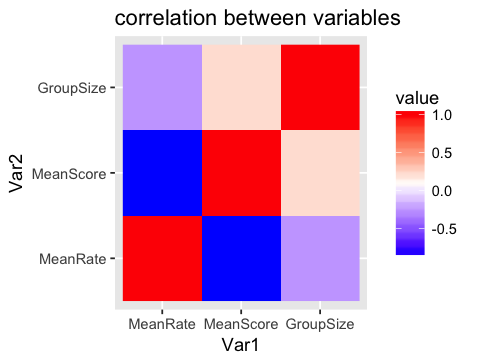

In [86]:
# correlation plot
options(repr.plot.width=4, repr.plot.height=3)
cormat <- round(cor(d[,2:4]),2)
melted_cormat <- melt(cormat)
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + geom_raster() + scale_fill_gradientn(colours=c("#0000FFFF","#FFFFFFFF","#FF0000FF"))+ ggtitle("correlation between variables")



### For GroupA, as time goes by, MeanScore increased and MeanRate decreased which implied the negative relation.

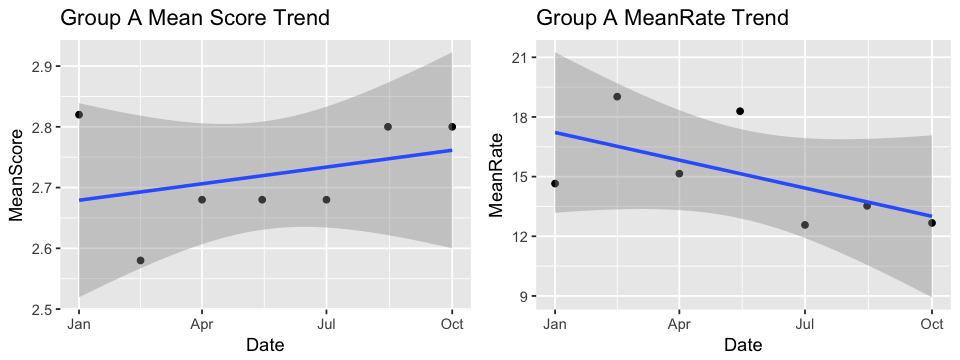

In [87]:
options(repr.plot.width=8, repr.plot.height=3)
as = ggplot(subset(d, GroupLabel == 'A'), aes(Date, MeanScore)) + geom_point() + geom_smooth(method = "lm", formula = y~x) + ggtitle("Group A Mean Score Trend")
ar = ggplot(subset(d, GroupLabel == 'A'), aes(Date, MeanRate)) + geom_point() + geom_smooth(method = "lm", formula = y~x)+ ggtitle("Group A MeanRate Trend")
grid.arrange(as, ar, ncol=2)

### GroupB has different trend, the MeanScore decreased and MeanRate increased.

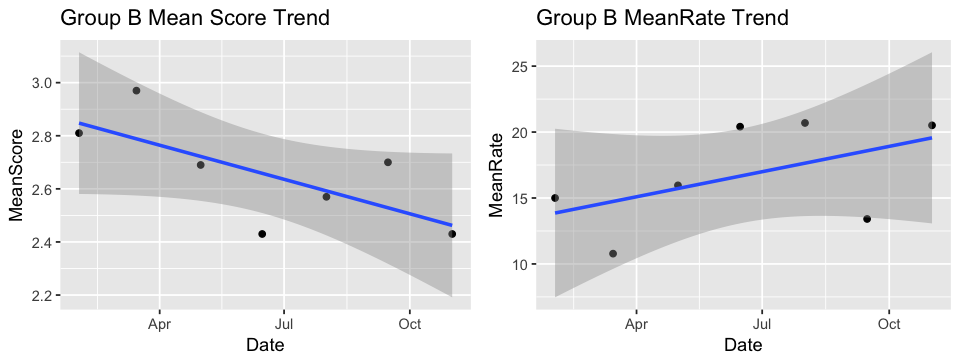

In [88]:
bs = ggplot(subset(d, GroupLabel == 'B'), aes(Date, MeanScore)) + geom_point() + geom_smooth(method = "lm", formula = y~x) + ggtitle("Group B Mean Score Trend")
br = ggplot(subset(d, GroupLabel == 'B'), aes(Date, MeanRate)) + geom_point() + geom_smooth(method = "lm", formula = y~x)+ ggtitle("Group B MeanRate Trend")
grid.arrange(bs, br, ncol=2)

### The trend of GroupC is the same as GroupB.

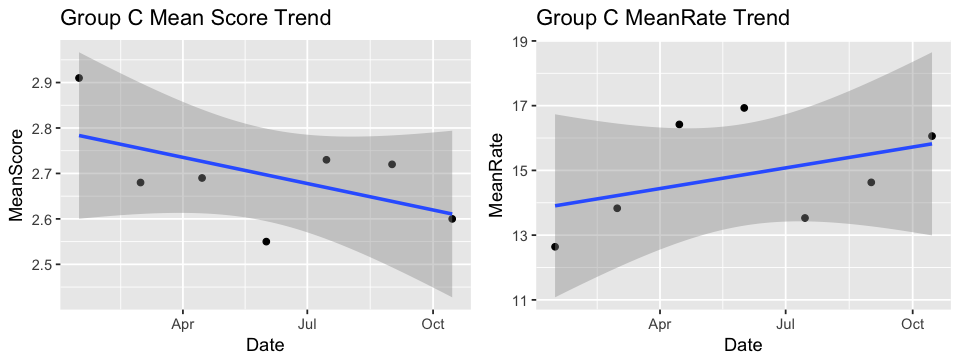

In [89]:
cs = ggplot(subset(d, GroupLabel == 'C'), aes(Date, MeanScore)) + geom_point() + geom_smooth(method = "lm", formula = y~x) + ggtitle("Group C Mean Score Trend")
cr = ggplot(subset(d, GroupLabel == 'C'), aes(Date, MeanRate)) + geom_point() + geom_smooth(method = "lm", formula = y~x)+ ggtitle("Group C MeanRate Trend")
grid.arrange(cs, cr, ncol=2)

### Since GruopSize is negative correlated with Rate. I expected a decreasing trend for GroupSize for B and C.

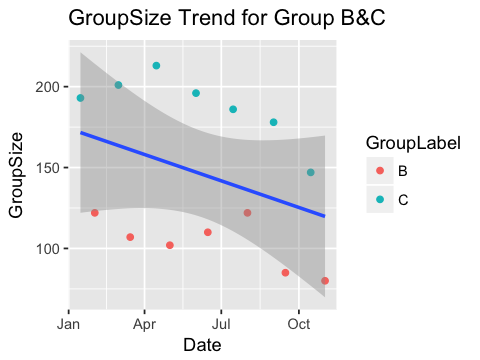

In [90]:
options(repr.plot.width=4, repr.plot.height=3)
ggplot(aes(Date,GroupSize), data=subset(d, GroupLabel =='B' |GroupLabel == 'C')) + geom_point(aes(colour = GroupLabel)) + geom_smooth(method = "lm", formula = y~x) + ggtitle("GroupSize Trend for Group B&C")

### For GroupA, the GroupSize trend did not went down that much in this case.

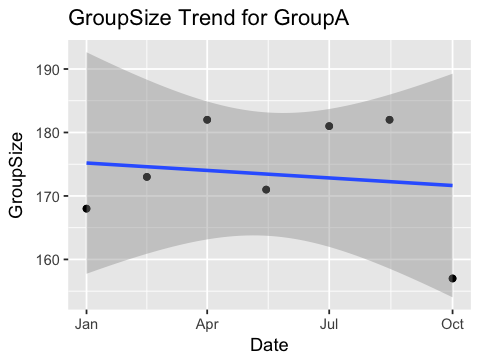

In [91]:
qplot(Date,GroupSize, data=subset(d, GroupLabel =='A')) + geom_point() + geom_smooth(method = "lm", formula = y~x) + ggtitle("GroupSize Trend for GroupA")

### Conclusion:
For B and C, the scores went down and GroupSize shrinked while A had a opposite behaviour. The source data might be a 
stock market dataset where each Group is a company and scores and rates are some measurements of a company.